In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection,linear_model
from sklearn.metrics import r2_score

In [2]:
full_df=pd.read_csv("car details v4.csv")

<Axes: >

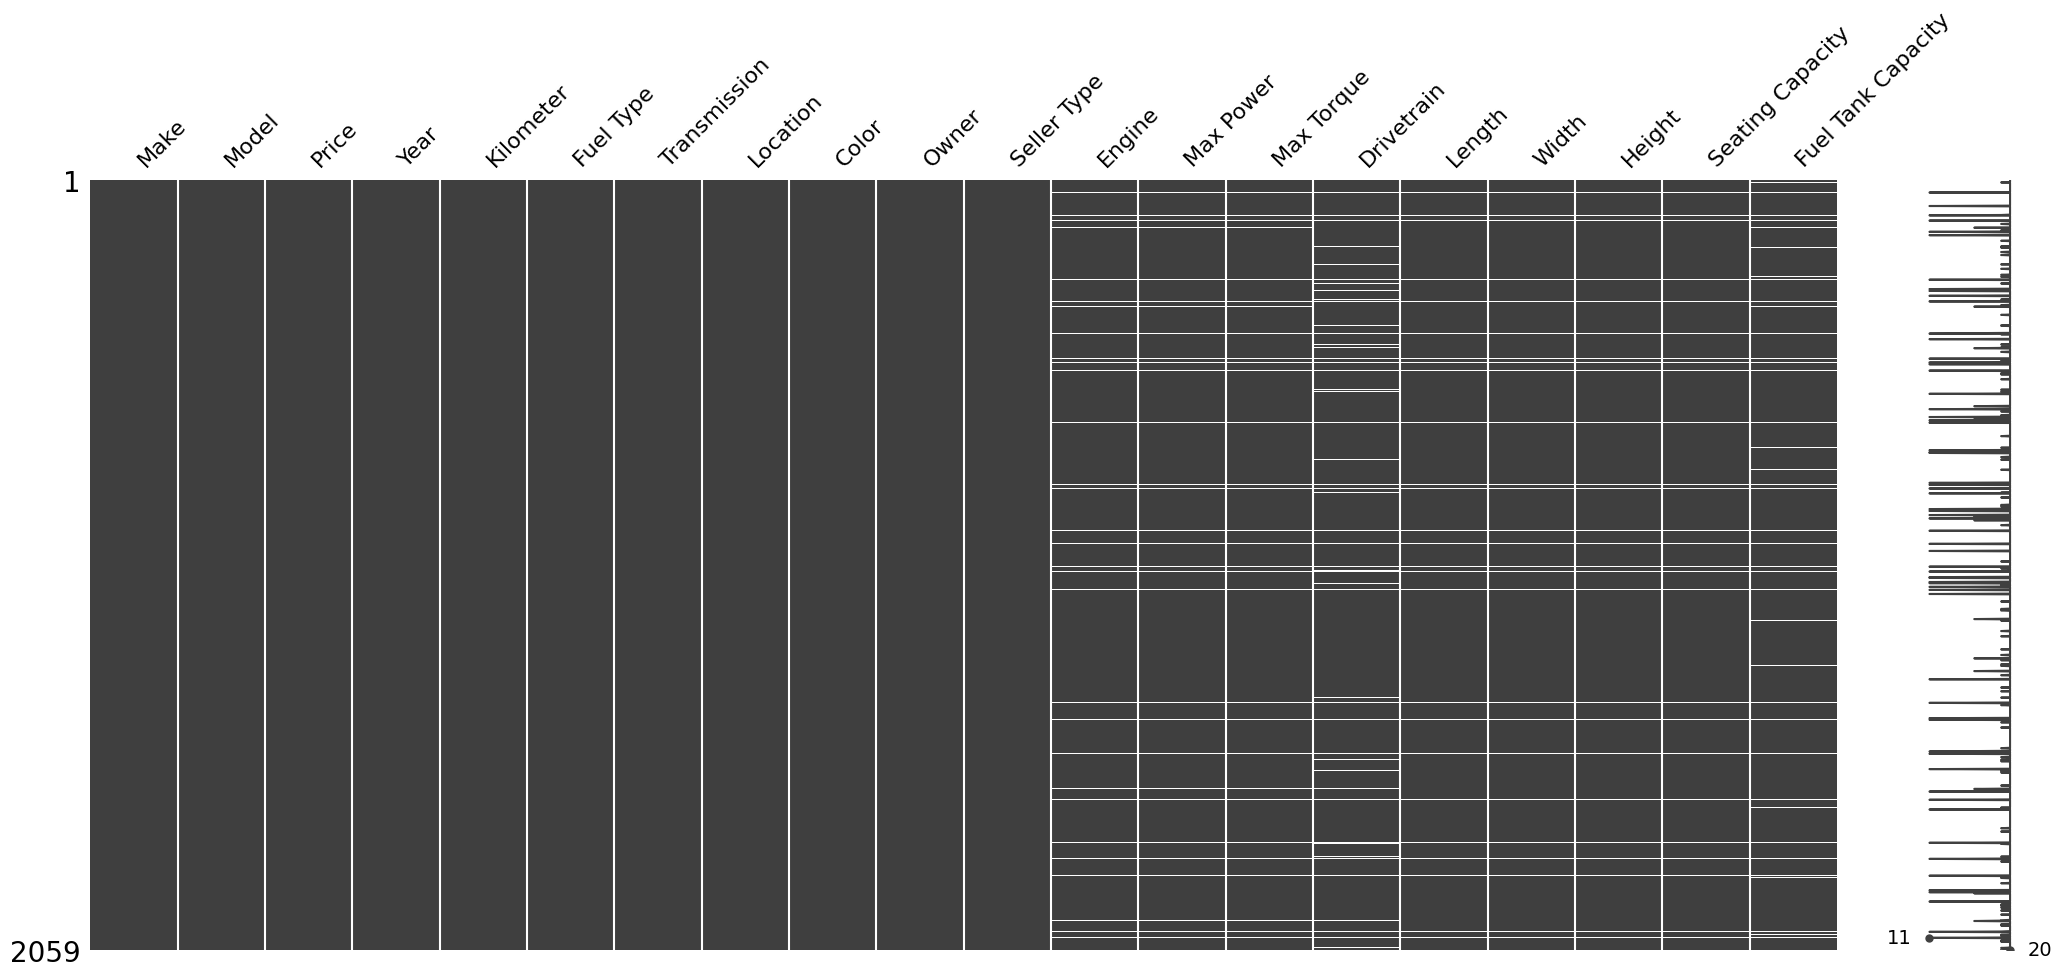

In [3]:
msno.matrix(full_df)

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
train_df, test_df = train_test_split(full_df, test_size=0.2) # 80% train, 20% test

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 1171 to 1498
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1590 non-null   object 
 12  Max Power           1590 non-null   object 
 13  Max Torque          1590 non-null   object 
 14  Drivetrain          1541 non-null   object 
 15  Length              1599 non-null   float64
 16  Width   

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1076 to 386
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                412 non-null    object 
 1   Model               412 non-null    object 
 2   Price               412 non-null    int64  
 3   Year                412 non-null    int64  
 4   Kilometer           412 non-null    int64  
 5   Fuel Type           412 non-null    object 
 6   Transmission        412 non-null    object 
 7   Location            412 non-null    object 
 8   Color               412 non-null    object 
 9   Owner               412 non-null    object 
 10  Seller Type         412 non-null    object 
 11  Engine              389 non-null    object 
 12  Max Power           389 non-null    object 
 13  Max Torque          389 non-null    object 
 14  Drivetrain          382 non-null    object 
 15  Length              396 non-null    float64
 16  Width     

In [8]:
train_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1171,Jeep,Compass Model S (O) 1.4 Petrol DCT,2700000,2021,17000,Petrol,Automatic,Delhi,Blue,First,Individual,1368 cc,161 bhp @ 5500 rpm,250 Nm @ 2500 rpm,FWD,4405.0,1818.0,1640.0,5.0,60.0
1179,Maruti Suzuki,XL6 Alpha AT Petrol,1190000,2020,47248,Petrol,Automatic,Jaipur,Blue,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,4445.0,1775.0,1700.0,6.0,45.0
2037,Honda,City V,730000,2016,51834,Petrol,Manual,Bangalore,Grey,Second,Individual,1497 cc,117 bhp @ 6600 rpm,145 Nm @ 4600 rpm,FWD,4440.0,1695.0,1495.0,5.0,40.0
983,Hyundai,Creta SX 1.6 AT CRDi,1425000,2018,72870,Diesel,Automatic,Mumbai,White,First,Corporate,1582 cc,126 bhp @ 4000 rpm,260 Nm @ 1500 rpm,FWD,4270.0,1780.0,1665.0,5.0,55.0
1621,Hyundai,Eon Magna +,325000,2017,56000,Petrol,Manual,Dehradun,Silver,First,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0


In [9]:
test_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1076,Maruti Suzuki,Swift DZire VXI AT,595000,2017,44100,Petrol,Automatic,Mumbai,Silver,First,Corporate,1197 cc,83 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
870,Audi,Q7 35 TDI Premium Plus + Sunroof,2475000,2012,118000,Diesel,Automatic,Bangalore,Black,First,Individual,2967 cc,241 bhp @ 3800 rpm,550 Nm @ 1750 rpm,AWD,5089.0,1983.0,1737.0,7.0,100.0
669,Hyundai,Verna SX Plus 1.6 CRDi AT,1085000,2018,45915,Diesel,Automatic,Mumbai,Black,First,Individual,1582 cc,126 bhp @ 4000 rpm,260 Nm @ 1500 rpm,FWD,4440.0,1729.0,1475.0,5.0,45.0
87,Mercedes-Benz,C-Class 220 BlueEfficiency,1650000,2013,58000,Diesel,Automatic,Bangalore,Silver,First,Individual,2143 cc,170 bhp @ 4200 rpm,400 Nm @ 2800 rpm,RWD,4596.0,1770.0,1447.0,5.0,66.0
1689,BMW,5-Series 520d Luxury Line [2017-2019],4800000,2019,31000,Diesel,Automatic,Delhi,Black,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [10]:
def extract_engine_capacity(row):
    if pd.isna(row['Engine']):
        match = re.search(r'\b(\d+\.\d+)\b', row['Model'])
        if match:
            return str(int(float(match.group(1))*1000))+" cc"
        else:
            return np.NaN
    return row['Engine']

train_df['Engine'] = train_df.apply(extract_engine_capacity, axis=1)

In [11]:
def extract_drivetrain(group):
    mode_value = group['Drivetrain'].mode().iloc[0]
    return group.fillna({'Drivetrain': mode_value})

train_df = train_df.groupby('Make').apply(extract_drivetrain)

In [12]:
train_df = train_df.dropna()

In [13]:
train_df[['bhp', 'rpm power']] = train_df['Max Power'].str.split('@', expand=True)
train_df['bhp'] = train_df['bhp'].str.replace(' bhp', '').str.strip()
train_df['rpm power'] = train_df['rpm power'].str.replace(' rpm', '').str.strip()

In [14]:
train_df[['Nm', 'rpm torque']] = train_df['Max Torque'].str.split('@', expand=True)
train_df['Nm'] = train_df['Nm'].str.replace(' Nm', '').str.strip()
train_df['rpm torque'] = train_df['rpm torque'].str.replace(' rpm', '').str.strip()

In [15]:
train_df = train_df.drop(['Max Power', 'Max Torque'], axis=1)
train_df.head()

Make                               Model    Price  Year  Kilometer  \
Make                                                                            
Audi 1577  Audi  Q5 2.0 TDI quattro Technology Pack  2690000  2016      57000   
     1579  Audi                  Q5 3.0 TDI quattro   825000  2009      63300   
     980   Audi      Q3 35 TDI quattro Premium Plus  2100000  2017      42000   
     960   Audi         Q7 35 TDI Premium + Sunroof  2400000  2014      42533   
     1427  Audi                  A6 2.0 TDI Premium  1490000  2012      42000   

          Fuel Type Transmission Location   Color  Owner  ... Drivetrain  \
Make                                                      ...              
Audi 1577    Diesel    Automatic  Gurgaon   White  First  ...        AWD   
     1579    Diesel    Automatic    Delhi   White  First  ...        FWD   
     980     Diesel    Automatic  Gurgaon  Silver  First  ...        AWD   
     960     Diesel    Automatic   Mumbai    Blue  First  ...        AWD   
     1427    Diesel    Automatic   Raipur   Brown  First  ...        FWD   

           Length   Width  Height  Seating Capacity  Fuel Tank Capacity  bhp  \
Make                                                                           
Audi 1577  4629.0  1898.0  1653.0               5.0                75.0  174   
     1579  4628.0  1879.0  1651.0               5.0                75.0  240   
     980   4385.0  1831.0  1608.0               5.0                64.0  184   
     960   5089.0  1983.0  1737.0               7.0               100.0  241   
     1427  4915.0  1874.0  1455.0               5.0                65.0  177   

           rpm power   Nm rpm torque  
Make                                  
Audi 1577       4200  380       1750  
     1579       4000  500       1500  
     980        3500  380       1750  
     960        3800  550       1750  
     1427       3750  380       1750  

[5 rows x 22 columns]

<Axes: >

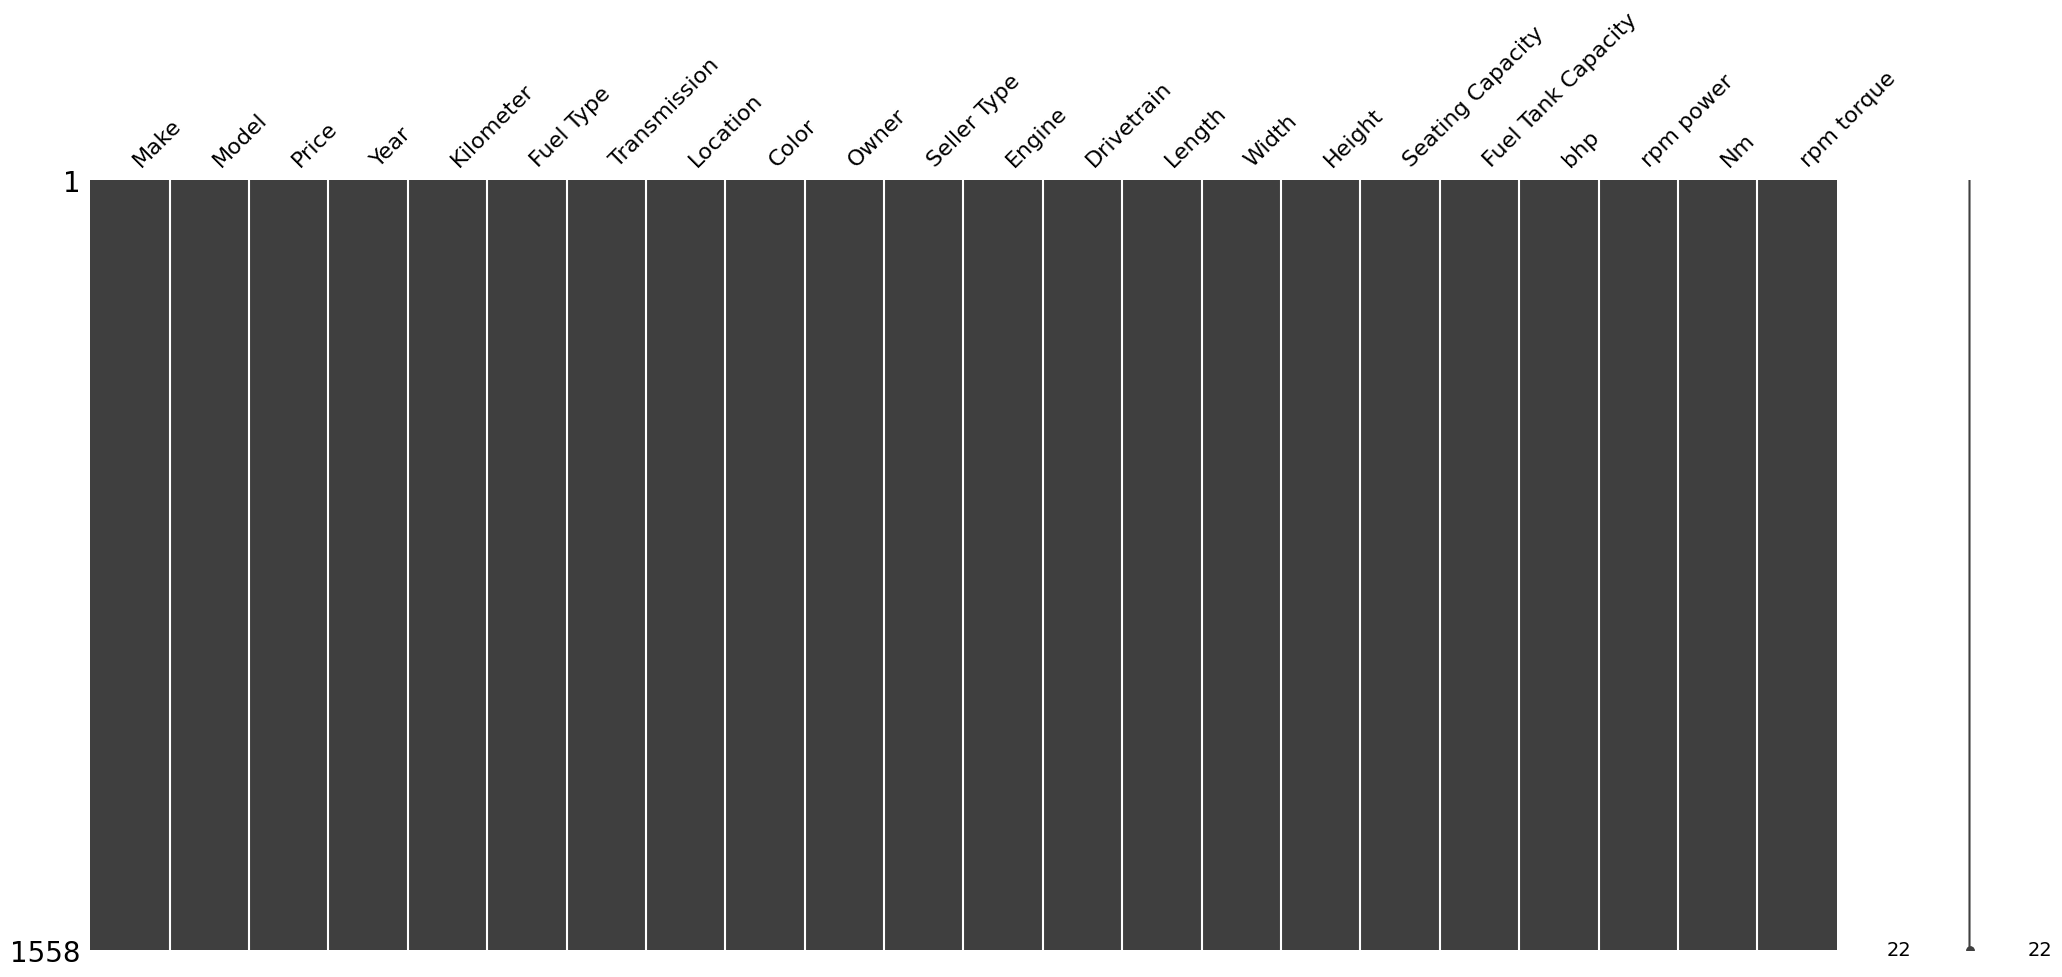

In [16]:
msno.matrix(train_df)

In [17]:
def one_hot_encode(df, columns): #unused, but valid for explanation
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [18]:
train_df = pd.get_dummies(train_df, columns=['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'bhp', 'rpm power', 'Nm', 'rpm torque'])

In [19]:
train_df.head()

Model    Price  Year  Kilometer  \
Make                                                                      
Audi 1577  Q5 2.0 TDI quattro Technology Pack  2690000  2016      57000   
     1579                  Q5 3.0 TDI quattro   825000  2009      63300   
     980       Q3 35 TDI quattro Premium Plus  2100000  2017      42000   
     960          Q7 35 TDI Premium + Sunroof  2400000  2014      42533   
     1427                  A6 2.0 TDI Premium  1490000  2012      42000   

            Engine  Length   Width  Height  Seating Capacity  \
Make                                                           
Audi 1577  1968 cc  4629.0  1898.0  1653.0               5.0   
     1579  2967 cc  4628.0  1879.0  1651.0               5.0   
     980   1968 cc  4385.0  1831.0  1608.0               5.0   
     960   2967 cc  5089.0  1983.0  1737.0               7.0   
     1427  1968 cc  4915.0  1874.0  1455.0               5.0   

           Fuel Tank Capacity  ...  rpm torque_4386  rpm torque_4400  \
Make                           ...                                     
Audi 1577                75.0  ...            False            False   
     1579                75.0  ...            False            False   
     980                 64.0  ...            False            False   
     960                100.0  ...            False            False   
     1427                65.0  ...            False            False   

           rpm torque_4500  rpm torque_4600  rpm torque_4700  rpm torque_4750  \
Make                                                                            
Audi 1577            False            False            False            False   
     1579            False            False            False            False   
     980             False            False            False            False   
     960             False            False            False            False   
     1427            False            False            False            False   

           rpm torque_4800  rpm torque_4850  rpm torque_5000  rpm torque_5600  
Make                                                                           
Audi 1577            False            False            False            False  
     1579            False            False            False            False  
     980             False            False            False            False  
     960             False            False            False            False  
     1427            False            False            False            False  

[5 rows x 537 columns]

In [20]:
year_mapping = {year: index for index, year in enumerate(sorted(train_df['Year'].unique()))}
train_df['Year'] = train_df['Year'].map(year_mapping)

In [21]:
train_df.head()

Model    Price  Year  Kilometer  \
Make                                                                      
Audi 1577  Q5 2.0 TDI quattro Technology Pack  2690000    11      57000   
     1579                  Q5 3.0 TDI quattro   825000     4      63300   
     980       Q3 35 TDI quattro Premium Plus  2100000    12      42000   
     960          Q7 35 TDI Premium + Sunroof  2400000     9      42533   
     1427                  A6 2.0 TDI Premium  1490000     7      42000   

            Engine  Length   Width  Height  Seating Capacity  \
Make                                                           
Audi 1577  1968 cc  4629.0  1898.0  1653.0               5.0   
     1579  2967 cc  4628.0  1879.0  1651.0               5.0   
     980   1968 cc  4385.0  1831.0  1608.0               5.0   
     960   2967 cc  5089.0  1983.0  1737.0               7.0   
     1427  1968 cc  4915.0  1874.0  1455.0               5.0   

           Fuel Tank Capacity  ...  rpm torque_4386  rpm torque_4400  \
Make                           ...                                     
Audi 1577                75.0  ...            False            False   
     1579                75.0  ...            False            False   
     980                 64.0  ...            False            False   
     960                100.0  ...            False            False   
     1427                65.0  ...            False            False   

           rpm torque_4500  rpm torque_4600  rpm torque_4700  rpm torque_4750  \
Make                                                                            
Audi 1577            False            False            False            False   
     1579            False            False            False            False   
     980             False            False            False            False   
     960             False            False            False            False   
     1427            False            False            False            False   

           rpm torque_4800  rpm torque_4850  rpm torque_5000  rpm torque_5600  
Make                                                                           
Audi 1577            False            False            False            False  
     1579            False            False            False            False  
     980             False            False            False            False  
     960             False            False            False            False  
     1427            False            False            False            False  

[5 rows x 537 columns]

In [22]:
train_df['Engine'] = train_df['Engine'].str.replace('cc', '').astype(int)

In [23]:
columns_to_normalize = ['Price', 'Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

scaler = preprocessing.MinMaxScaler()

train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

In [24]:
train_df.head()

Model     Price  Year  Kilometer  \
Make                                                                       
Audi 1577  Q5 2.0 TDI quattro Technology Pack  0.075563    11   0.061622   
     1579                  Q5 3.0 TDI quattro  0.022203     4   0.068432   
     980       Q3 35 TDI quattro Premium Plus  0.058682    12   0.045405   
     960          Q7 35 TDI Premium + Sunroof  0.067266     9   0.045982   
     1427                  A6 2.0 TDI Premium  0.041229     7   0.045405   

             Engine    Length     Width    Height  Seating Capacity  \
Make                                                                  
Audi 1577  0.225201  0.619433  0.567785  0.562660          0.500000   
     1579  0.392594  0.619028  0.542282  0.560102          0.500000   
     980   0.225201  0.520648  0.477852  0.505115          0.500000   
     960   0.392594  0.805668  0.681879  0.670077          0.833333   
     1427  0.225201  0.735223  0.535570  0.309463          0.500000   

           Fuel Tank Capacity  ...  rpm torque_4386  rpm torque_4400  \
Make                           ...                                     
Audi 1577            0.666667  ...            False            False   
     1579            0.666667  ...            False            False   
     980             0.544444  ...            False            False   
     960             0.944444  ...            False            False   
     1427            0.555556  ...            False            False   

           rpm torque_4500  rpm torque_4600  rpm torque_4700  rpm torque_4750  \
Make                                                                            
Audi 1577            False            False            False            False   
     1579            False            False            False            False   
     980             False            False            False            False   
     960             False            False            False            False   
     1427            False            False            False            False   

           rpm torque_4800  rpm torque_4850  rpm torque_5000  rpm torque_5600  
Make                                                                           
Audi 1577            False            False            False            False  
     1579            False            False            False            False  
     980             False            False            False            False  
     960             False            False            False            False  
     1427            False            False            False            False  

[5 rows x 537 columns]

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1558 entries, ('Audi', 1577) to ('Volvo', 833)
Columns: 537 entries, Model to rpm torque_5600
dtypes: bool(527), float64(8), int64(1), object(1)
memory usage: 1006.9+ KB


In [26]:
y = train_df[['Price']].values
X = train_df[['Engine']].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 0.36


In [28]:
y_adv = y
X_adv = train_df.drop(['Model'], axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_adv, y_adv, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 1.00


In [30]:
model.score(X_test, y_test)

1.0